# Data Base to get info about Power 9 and 8

In [25]:
#we use imb_db_dbi more than ibm_db
#import ibm_db as db 
import ibm_db_dbi
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [26]:
#DB connection
try:
    conn = ibm_db_dbi.connect('DATABASE=;'
                     'HOSTNAME=;'  # 127.0.0.1 or localhost works if it's local
                     'PORT=;'
                     'PROTOCOL=;'
                     'UID=;'
                     'PWD=;', '', '')
except:
    print("No connection:", ibm_db_dbi.conn_errormsg())
else:
    print("The connection was successful")

The connection was successful


In [27]:
query = """WITH ESS(MFGN,ORNO,TESTLOGICAL,PROD) AS (
select DISTINCT TCMFGN AS MFGN,TCORNO AS ORNO,TCMFS_TEST_CELL AS TESTLOGICAL,WUPROD AS PROD
from testengq.tcogda
join "QRYQ"."MFSGWU10_GRC" on tcmfgn = wumfgn and tcorno = WUWORN
where  START_TIMESTAMP between '2021-02-01 00:00:00' and '2021-03-01 00:00:00' and TEST_RUN_TIME is not null  and TCMMDL in ('22E') and substring(TCORNO,1,1) != 'Y' and WUPROD = 'ZZ_EDATA')
select distinct *, 
case
when T.TCPRLN in ('T_P8BRMP','T_P8BRZP') and TCCECC < 3 then 'Brazos 1-2 CECs AIX/Linux'
when T.TCPRLN in ('T_P9ZZP','T_P9ZZL') and T.TCMMDL not in ('22G','41G','42G','22E') then 'ZZ AIX/Linux'
when T.TCMMDL in ('22G','41G','42G','22E') and PROD IS NULL and T.TCPRLN in ('T_P9ZZP','T_P9ZZL') then 'ZZ Gen4 AIX/Linux'
when T.TCMMDL in ('22G','41G','42G','22E') and PROD IS NULL and T.TCPRLN in ('T_P9ZZI','T_P9ZZM') then 'ZZ Gen4 IBM i'
when T.TCMMDL in ('22E') and PROD = 'ZZ_EDATA' then 'ZZ Gen 4 ESS 5K'
when T.TCPRLN in ('T_P9ZEP')  then 'Zeppelin'
when T.TCPRLN in ('T_P8TULP')  then 'Tuleta AIX/Linux'
when T.TCPRLN in ('T_P8TULI')  then 'Tuleta / IBM i'
when T.TCPRLN in ('T_OPWSPN')  then 'Witherspoon'
when T.TCPRLN in ('T_OPMHWK')  then 'Mihawk'
when T.TCPRLN in ('T_OPGRSN')  then 'Garrison'
when T.TCPRLN in ('T_OPFIRE')  then 'Firestone'
when T.TCPRLN in ('T_P9ZZI','T_P9ZZM')  then 'ZZ IBM i'
when T.TCPRLN in('T_P8BRMI','T_P8BRZI') and T.TCCECC < 3 then 'Brazos 1-2 CECs IBM i'
when T.TCPRLN in ('T_P8BRMI','T_P8BRZI','T_P8BRMP','T_P8BRZP') and T.TCCECC > 2 then 'Brazos 3-4 CECs'
when T.TCPRLN in ('T_P9FLMP','T_P9FLTP','T_P9FIPR') and T.TCCECC < 3 then 'Fleetwood AIX/Linux'
when T.TCPRLN in ('T_P9FLMI','T_P9FLTI') and T.TCCECC < 3 then 'Fleetwood IBM i'
when T.TCPRLN in ('T_P9FLMI','T_P9FLMP','T_P9FLTI','T_P9FLTP','T_P9FIPR') and T.TCCECC > 2 then 'Fleetwood 3-4 CECs'
when T.TCPRLN in ('T_P8ALPQ','T_P8ALP ')  then 'Alpine'
end as NEWPRLN
from testengq.tcogda as T LEFT JOIN ESS 
ON TCMFGN = MFGN AND TCORNO = ORNO AND TCMFS_TEST_CELL = TESTLOGICAL
where T.START_TIMESTAMP between '2021-02-01 00:00:00' and '2021-03-01 00:00:00' and T.TEST_RUN_TIME is not null and substring(T.TCORNO,1,1) != 'Y' AND T.TCROUN = 1 
order by TOTAL_TIME DESC"""

In [28]:
df = pd.read_sql(query, conn)


In [29]:
df.fillna(0, inplace=True)
df

,TCROUN,TCMFGN,TCORNO,TCMFS_TEST_CELL,TCCECC,TCPRLN,TCMATP,TCMMDL,START_TIMESTAMP,FINISH_TIMESTAMP,TOTAL_TIME,TEST_CYCLE_TIME,TEST_RUN_TIME,TEST_ATN_MIN,TEST_ATN_CNT,TEST_RWK_MIN,TEST_RWK_CNT,SWPRE_RUN_TIME,SWPRE_ATN_MIN,SWPRE_ATN_CNT,SWPRE_RWK_MIN,SWPRE_RWK_CNT,EXT_RUN_TIME,EXT_ATN_MIN,EXT_ATN_CNT,EXT_RWK_MIN,EXT_RWK_CNT,HOLD_MIN,HOLD_CNT,MFGN,ORNO,TESTLOGICAL,PROD,NEWPRLN
0,1,1AU7944,A2MQLG,T3285445,0,T_OPMHWK,9183,22X,2021-02-05 22:35:45,2021-02-12 18:55:14,164.31,164.00,690.31,41.69,12,3038.4,16.0,0.00,0.00,0.0,0.0,0.0,207.0,0.0,0.0,0.0,0.0,5862.6,3,0,0,0,0,Mihawk
1,1,1AU8D45,A2MTMV,T3286347,0,T_P9ZZI,9009,41G,2021-02-11 20:49:22,2021-02-16 17:14:19,116.40,116.21,699.54,15.46,8,126.0,3.0,111.00,0.00,0.0,376.0,3.0,176.0,0.0,0.0,0.0,0.0,5469.0,3,0,0,0,0,ZZ Gen4 IBM i
2,1,1AU8HL1,A2MW5F,T3287436,0,T_P9ZZI,9009,41G,2021-02-18 22:23:16,2021-02-23 10:26:49,108.05,107.85,1278.57,31.43,8,384.2,5.0,266.70,23.30,1.0,99.6,2.0,360.0,0.0,0.0,0.0,0.0,4027.2,6,0,0,0,0,ZZ Gen4 IBM i
3,1,1AU8D01,A2MTKM,T3286328,0,T_P9ZZI,9009,41G,2021-02-11 20:48:47,2021-02-15 12:56:14,88.11,88.03,626.59,11.41,3,0.0,0.0,182.34,27.66,1.0,29.0,1.0,187.0,0.0,0.0,0.0,0.0,4218.0,1,0,0,0,0,ZZ Gen4 IBM i
4,1,1AU8DX1,A2MTJG,T3286323,0,T_P9ZZP,9009,41G,2021-02-12 10:26:02,2021-02-15 13:01:13,74.58,74.45,654.53,5.67,2,6.0,1.0,54.00,0.00,0.0,0.0,0.0,223.0,0.0,0.0,0.0,0.0,3523.8,1,0,0,0,0,ZZ Gen4 AIX/Linux
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,1,1AU7233,A2MK1J,T3286228,0,T_P9ZZP,9009,41G,2021-02-27 01:26:09,2021-02-27 13:19:13,11.88,11.83,701.59,4.41,2,0.0,0.0,0.00,0.00,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,ZZ Gen4 AIX/Linux
1363,1,BBCF86M,$CYXDS,T3285545,1,T_P9FIPR,9080,M9S,2021-02-10 22:23:56,2021-02-11 10:11:51,11.78,11.71,669.17,5.83,4,0.0,0.0,0.00,0.00,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,Fleetwood AIX/Linux
1364,1,1AU8NI2,A2N1S1,T3289205,0,T_P9ZZP,9009,22G,2021-02-26 19:45:01,2021-02-27 07:24:29,11.65,11.55,664.38,23.62,4,0.0,0.0,0.00,0.00,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,ZZ Gen4 AIX/Linux
1365,1,1AU8MP8,A2N137,T3288892,0,T_P9ZZP,9009,22G,2021-02-26 16:36:53,2021-02-27 03:34:09,10.95,10.90,646.15,2.85,2,0.0,0.0,0.00,0.00,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,ZZ Gen4 AIX/Linux


In [33]:
df['Test'] = df['TEST_RUN_TIME'].apply(lambda x: x/60)
df1 = df[df["NEWPRLN"] == "ZZ Gen 4 ESS 5K"]
df1 

,TCROUN,TCMFGN,TCORNO,TCMFS_TEST_CELL,TCCECC,TCPRLN,TCMATP,TCMMDL,START_TIMESTAMP,FINISH_TIMESTAMP,TOTAL_TIME,TEST_CYCLE_TIME,TEST_RUN_TIME,TEST_ATN_MIN,TEST_ATN_CNT,TEST_RWK_MIN,TEST_RWK_CNT,SWPRE_RUN_TIME,SWPRE_ATN_MIN,SWPRE_ATN_CNT,SWPRE_RWK_MIN,SWPRE_RWK_CNT,EXT_RUN_TIME,EXT_ATN_MIN,EXT_ATN_CNT,EXT_RWK_MIN,EXT_RWK_CNT,HOLD_MIN,HOLD_CNT,MFGN,ORNO,TESTLOGICAL,PROD,NEWPRLN,Test,Rework,Preload,Attention,EXT_OPS,Hold
8,1,1AU8B22,A2MS5Z,T3285871,0,T_P9ZZL,5105,22E,2021-02-12 02:02:27,2021-02-14 21:00:03,66.95,66.66,1804.57,168.43,14,1567.0,11.0,0.0,0.0,0.0,0.0,0.0,448.00,0.00,0.0,0.0,0.0,12.0,1,1AU8B22,A2MS5Z,T3285871,ZZ_EDATA,ZZ Gen 4 ESS 5K,30.076167,26.116667,0.0,2.807167,7.466667,0.20
12,1,1AU8B22,A2MS65,T3285872,0,T_P9ZZL,5105,22E,2021-02-12 02:03:17,2021-02-14 14:54:48,60.85,60.68,2655.66,181.34,4,360.0,5.0,0.0,0.0,0.0,0.0,0.0,444.00,0.00,0.0,0.0,0.0,0.0,0,1AU8B22,A2MS65,T3285872,ZZ_EDATA,ZZ Gen 4 ESS 5K,44.261000,6.000000,0.0,3.022333,7.400000,0.00
13,1,1AU8H02,A2MWKK,T3287529,0,T_P9ZZL,5105,22E,2021-02-24 17:30:19,2021-02-27 04:33:54,59.05,58.73,1320.57,151.43,12,2052.0,16.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0,1AU8H02,A2MWKK,T3287529,ZZ_EDATA,ZZ Gen 4 ESS 5K,22.009500,34.200000,0.0,2.523833,0.000000,0.00
17,1,1AU8BH9,A2MRKK,T3285662,0,T_P9ZZL,5105,22E,2021-02-13 23:32:48,2021-02-16 06:42:24,55.15,55.03,1796.35,3.65,4,1075.0,4.0,0.0,0.0,0.0,0.0,0.0,427.00,0.00,0.0,0.0,0.0,0.0,0,1AU8BH9,A2MRKK,T3285662,ZZ_EDATA,ZZ Gen 4 ESS 5K,29.939167,17.916667,0.0,0.060833,7.116667,0.00
18,1,1AU8H02,A2MWKB,T3287534,0,T_P9ZZL,5105,22E,2021-02-24 17:31:24,2021-02-26 23:56:37,54.41,54.05,2136.67,14.33,5,1092.0,9.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0,1AU8H02,A2MWKB,T3287534,ZZ_EDATA,ZZ Gen 4 ESS 5K,35.611167,18.200000,0.0,0.238833,0.000000,0.00
27,1,1AU8D76,A2MTRJ,T3286796,0,T_P9ZZL,5105,22E,2021-02-16 21:42:43,2021-02-18 22:47:16,49.06,48.81,1797.31,120.69,5,504.0,9.0,0.0,0.0,0.0,0.0,0.0,67.00,0.00,0.0,440.0,1.0,0.0,0,1AU8D76,A2MTRJ,T3286796,ZZ_EDATA,ZZ Gen 4 ESS 5K,29.955167,15.733333,0.0,2.011500,1.116667,0.00
30,1,1AU8FI4,A2MULW,T3286788,0,T_P9ZZL,5105,22E,2021-02-16 22:50:40,2021-02-18 22:45:59,47.91,47.01,1316.89,84.11,12,1040.0,8.0,0.0,0.0,0.0,0.0,0.0,380.00,0.00,0.0,0.0,0.0,0.0,0,1AU8FI4,A2MULW,T3286788,ZZ_EDATA,ZZ Gen 4 ESS 5K,21.948167,17.333333,0.0,1.401833,6.333333,0.00
31,1,1AU8D76,A2MTRQ,T3286797,0,T_P9ZZL,5105,22E,2021-02-16 21:43:27,2021-02-18 19:17:24,45.55,45.43,2022.86,130.14,5,109.0,3.0,0.0,0.0,0.0,0.0,0.0,361.00,0.00,0.0,103.0,1.0,0.0,0,1AU8D76,A2MTRQ,T3286797,ZZ_EDATA,ZZ Gen 4 ESS 5K,33.714333,3.533333,0.0,2.169000,6.016667,0.00
34,1,1AU8BH9,A2MRKD,T3285660,0,T_P9ZZL,5105,22E,2021-02-13 23:32:08,2021-02-15 20:51:51,45.31,45.16,1432.15,11.85,5,838.0,4.0,0.0,0.0,0.0,0.0,0.0,428.00,0.00,0.0,0.0,0.0,0.0,0,1AU8BH9,A2MRKD,T3285660,ZZ_EDATA,ZZ Gen 4 ESS 5K,23.869167,13.966667,0.0,0.197500,7.133333,0.00
40,1,1AU8B31,A2MS79,T3285879,0,T_P9ZZL,5105,22E,2021-02-12 05:34:08,2021-02-14 01:50:53,44.26,44.20,1501.85,117.15,8,315.0,2.0,0.0,0.0,0.0,0.0,0.0,647.62,0.38,1.0,70.0,1.0,0.0,0,1AU8B31,A2MS79,T3285879,ZZ_EDATA,ZZ Gen 4 ESS 5K,25.030833,6.416667,0.0,1.958833,10.793667,0.00


In [31]:
df['Test'] = df['TEST_RUN_TIME'].apply(lambda x: x/60)
df['Rework'] = df['TEST_RWK_MIN'] + df['SWPRE_RWK_MIN'] + df['EXT_RWK_MIN']
df['Rework'] = df['Rework'].apply(lambda x: x/60)
df['Preload'] = df['SWPRE_RUN_TIME'].apply(lambda x : x/60)
df['Attention'] = df['TEST_ATN_MIN'] + df['SWPRE_ATN_MIN'] + df['EXT_ATN_MIN']
df['Attention'] = df['Attention'].apply(lambda x : x/60)
df['EXT_OPS'] = df['EXT_RUN_TIME'].apply(lambda x :x/60)
df['Hold'] = df['HOLD_MIN'].apply(lambda x :x/60)

In [32]:
graph_df = df[['TCORNO','Test','Rework','Preload','Attention','EXT_OPS','Hold']].copy()
graph_df

,TCORNO,Test,Rework,Preload,Attention,EXT_OPS,Hold
0,A2MQLG,11.505167,50.640000,0.000,0.694833,3.450000,97.71
1,A2MTMV,11.659000,8.366667,1.850,0.257667,2.933333,91.15
2,A2MW5F,21.309500,8.063333,4.445,0.912167,6.000000,67.12
3,A2MTKM,10.443167,0.483333,3.039,0.651167,3.116667,70.30
4,A2MTJG,10.908833,0.100000,0.900,0.094500,3.716667,58.73
...,...,...,...,...,...,...,...
1362,A2MK1J,11.693167,0.000000,0.000,0.073500,0.066667,0.00
1363,$CYXDS,11.152833,0.000000,0.000,0.097167,0.466667,0.00
1364,A2N1S1,11.073000,0.000000,0.000,0.393667,0.083333,0.00
1365,A2N137,10.769167,0.000000,0.000,0.047500,0.083333,0.00


In [9]:
graph_df = graph_df.rename(columns={'TCORNO': 'ORDER_NUMBER'})

In [10]:
graph_df = graph_df.set_index('ORDER_NUMBER')

In [11]:
print(graph_df.columns)

Index(['Test', 'Rework', 'Preload', 'Attention', 'EXT_OPS', 'Hold'], dtype='object')


In [12]:
count = graph_df.groupby('ORDER_NUMBER').count()
count

,Test,Rework,Preload,Attention,EXT_OPS,Hold
ORDER_NUMBER,,,,,,
919NSF,1,1,1,1,1,1
A2MS1A,1,1,1,1,1,1
A2N0KU,1,1,1,1,1,1


In [13]:
target = count['Test'].values.copy()

In [14]:
target[:]=10

In [15]:
SMALL_SIZE = 5
MEDIUM_SIZE = 8
BIGGER_SIZE = 12
plt.rc('font', size=MEDIUM_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)

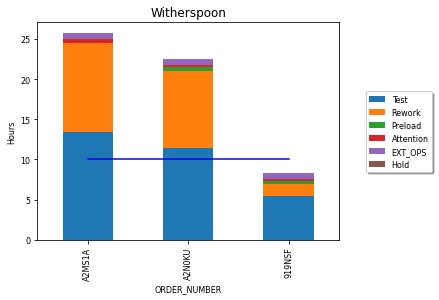

<Figure size 2880x2880 with 0 Axes>

In [16]:
ax = graph_df.plot(kind = 'bar',stacked=True)
ax.grid(False)
plt.title('Witherspoon')
plt.ylabel('Hours', color='k')
plt.plot(target, color='b')
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.9, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.2, 0.7), shadow=True, ncol=1)
plt.figure(figsize=(40,40))
plt.savefig('plot.png')
plt.show()

In [22]:
fig, ax = plt.subplots()
ax = graph_df.plot(kind = 'bar',stacked=True)
ax.grid(False)
ax.bar(graph_df.columns, graph_df[])
plt.show()

TypeError: only size-1 arrays can be converted to Python scalars